### Install Required Libraries

In [1]:
!pip install yellowbrick

### Import the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### Import the Data

In [3]:
data=pd.read_excel('ecom_customer_data.xlsx')

### Display the first five rows

In [7]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


### Information about the data

In [8]:
df=data.copy() #creating a new copy of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

### Descriptive Statistics of the Data

In [9]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


### Data Cleaning

#### Handling the Duplicates

In [10]:
print(df.duplicated()) #finding whether a row is duplicated or not

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool


In [11]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Cust_ID, Gender, Orders, Jordan, Gatorade, Samsung, Asus, Udis, Mondelez International, Wrangler, Vans, Fila, Brooks, H&M, Dairy Queen, Fendi, Hewlett Packard, Pladis, Asics, Siemens, J.M. Smucker, Pop Chips, Juniper, Huawei, Compaq, IBM, Burberry, Mi, LG, Dior, Scabal, Tommy Hilfiger, Hollister, Forever 21, Colavita, Microsoft, Jiffy mix, Kraft]
Index: []

[0 rows x 38 columns]


#### Handling the Missing Values

In [12]:
df.isna().sum() #finding no. of missing values in each column

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [13]:
# Mode Imputation
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [14]:
df.isna().sum() #checking for missing values again

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

### Data Visualization

In [15]:
print(df.Gender.value_counts()) # printing the counts of each gender present in Gender Column

Gender
F    24778
M     5222
Name: count, dtype: int64


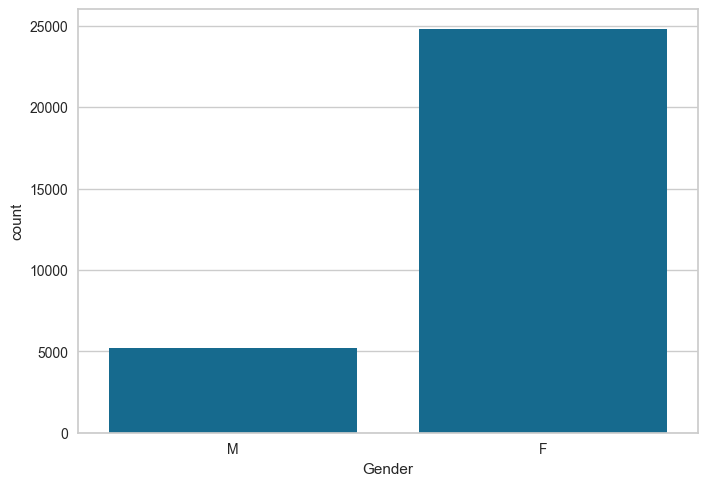

In [16]:
sns.countplot(data=df,x='Gender') #count plot of the Gender Column
plt.show()

<Axes: xlabel='Orders', ylabel='count'>

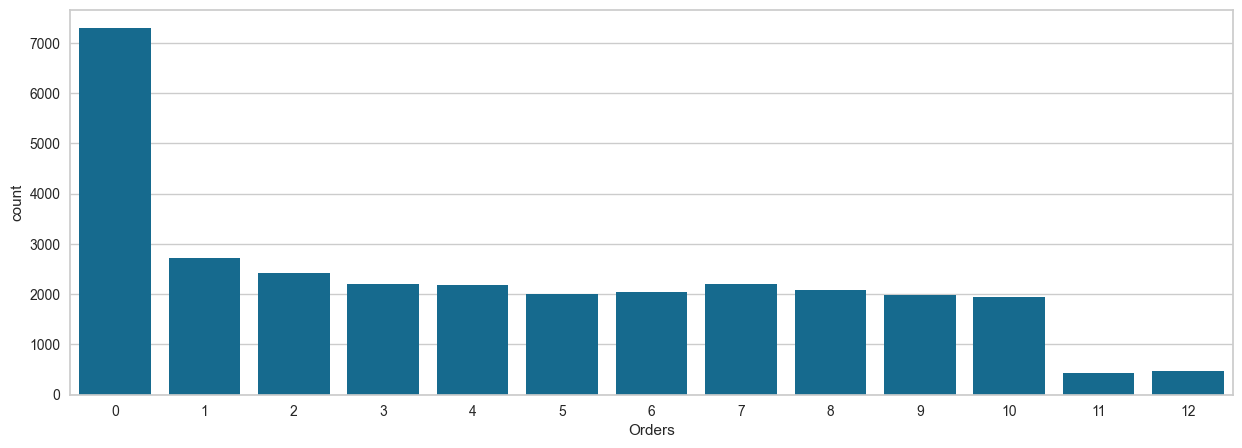

In [17]:
plt.figure(figsize=(15,5))
# plt.subplot(1,2,2)
sns.countplot(data=df,x='Orders')

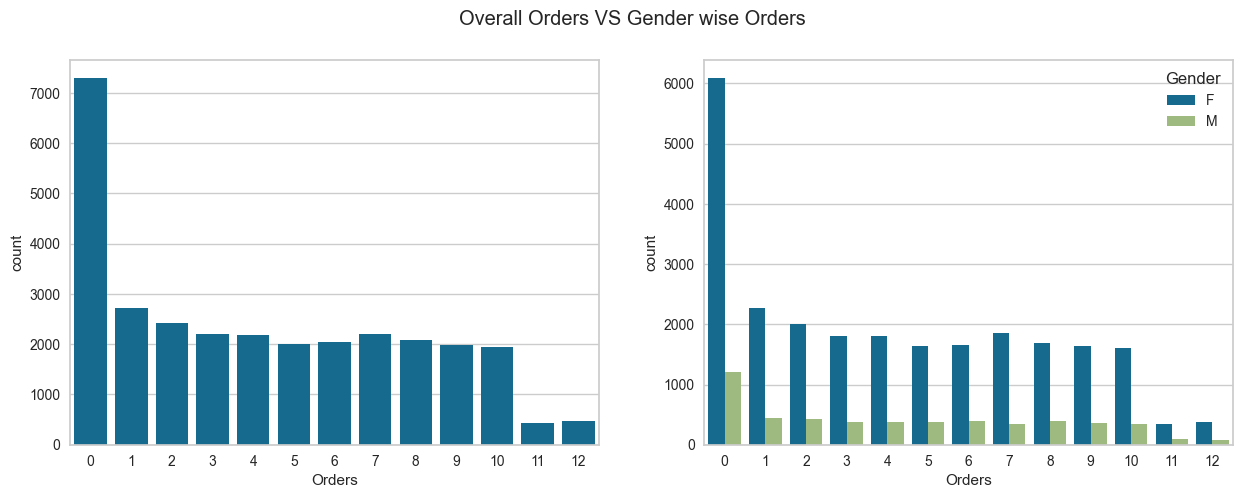

In [18]:
plt.figure(figsize=(15,5)) #creating figure with width of 15 units and height of 5 units
plt.subplot(1,2,1) #creating a subplot in plot
sns.countplot(data=df,x='Orders') #countplot of orders

#Order count by each number
plt.subplot(1,2,2) # creating second subplot in plot
sns.countplot(data=df,x='Orders',hue='Gender') #countplot of orders in Gender wise
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()

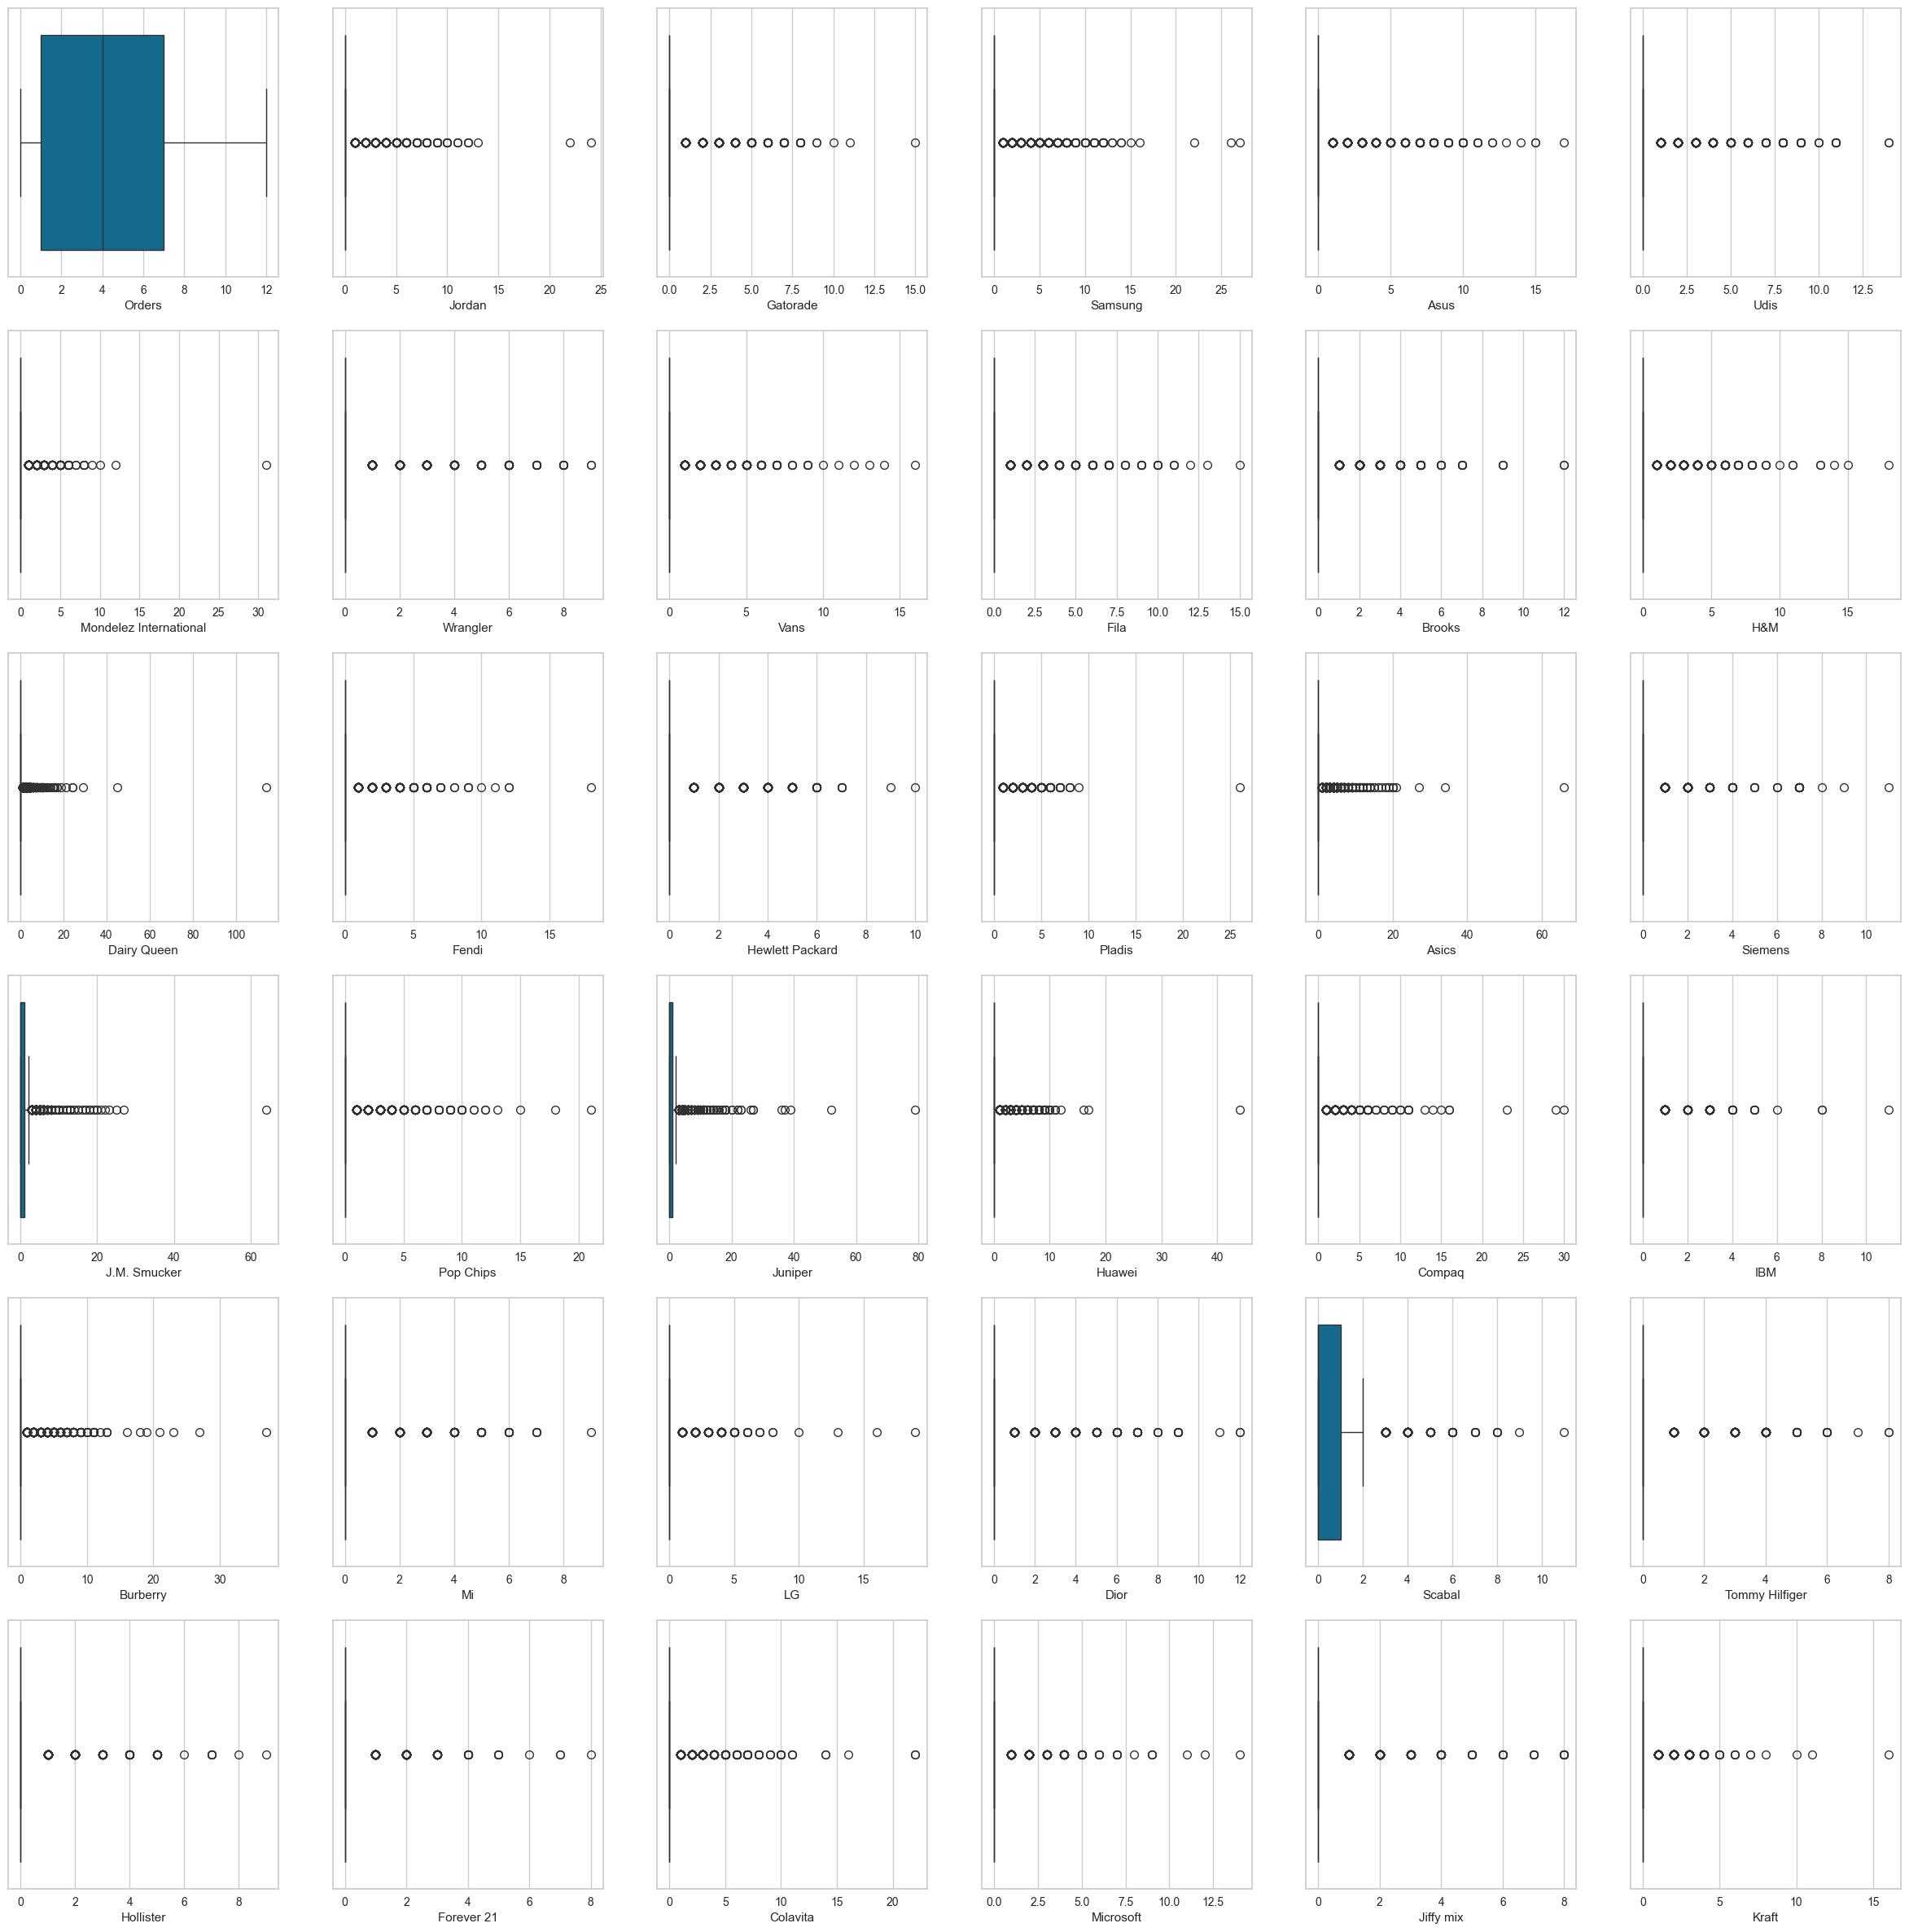

In [19]:
#box plots of orders and searches of each brands
cols=list(df.columns[2:])
def dist_list(lst):
    plt.figure(figsize=(30,30))
    for i,col in enumerate(lst,1):
        plt.subplot(6,6,i)
        sns.boxplot(data=df,x=df[col]) #boxplot
dist_list(cols)

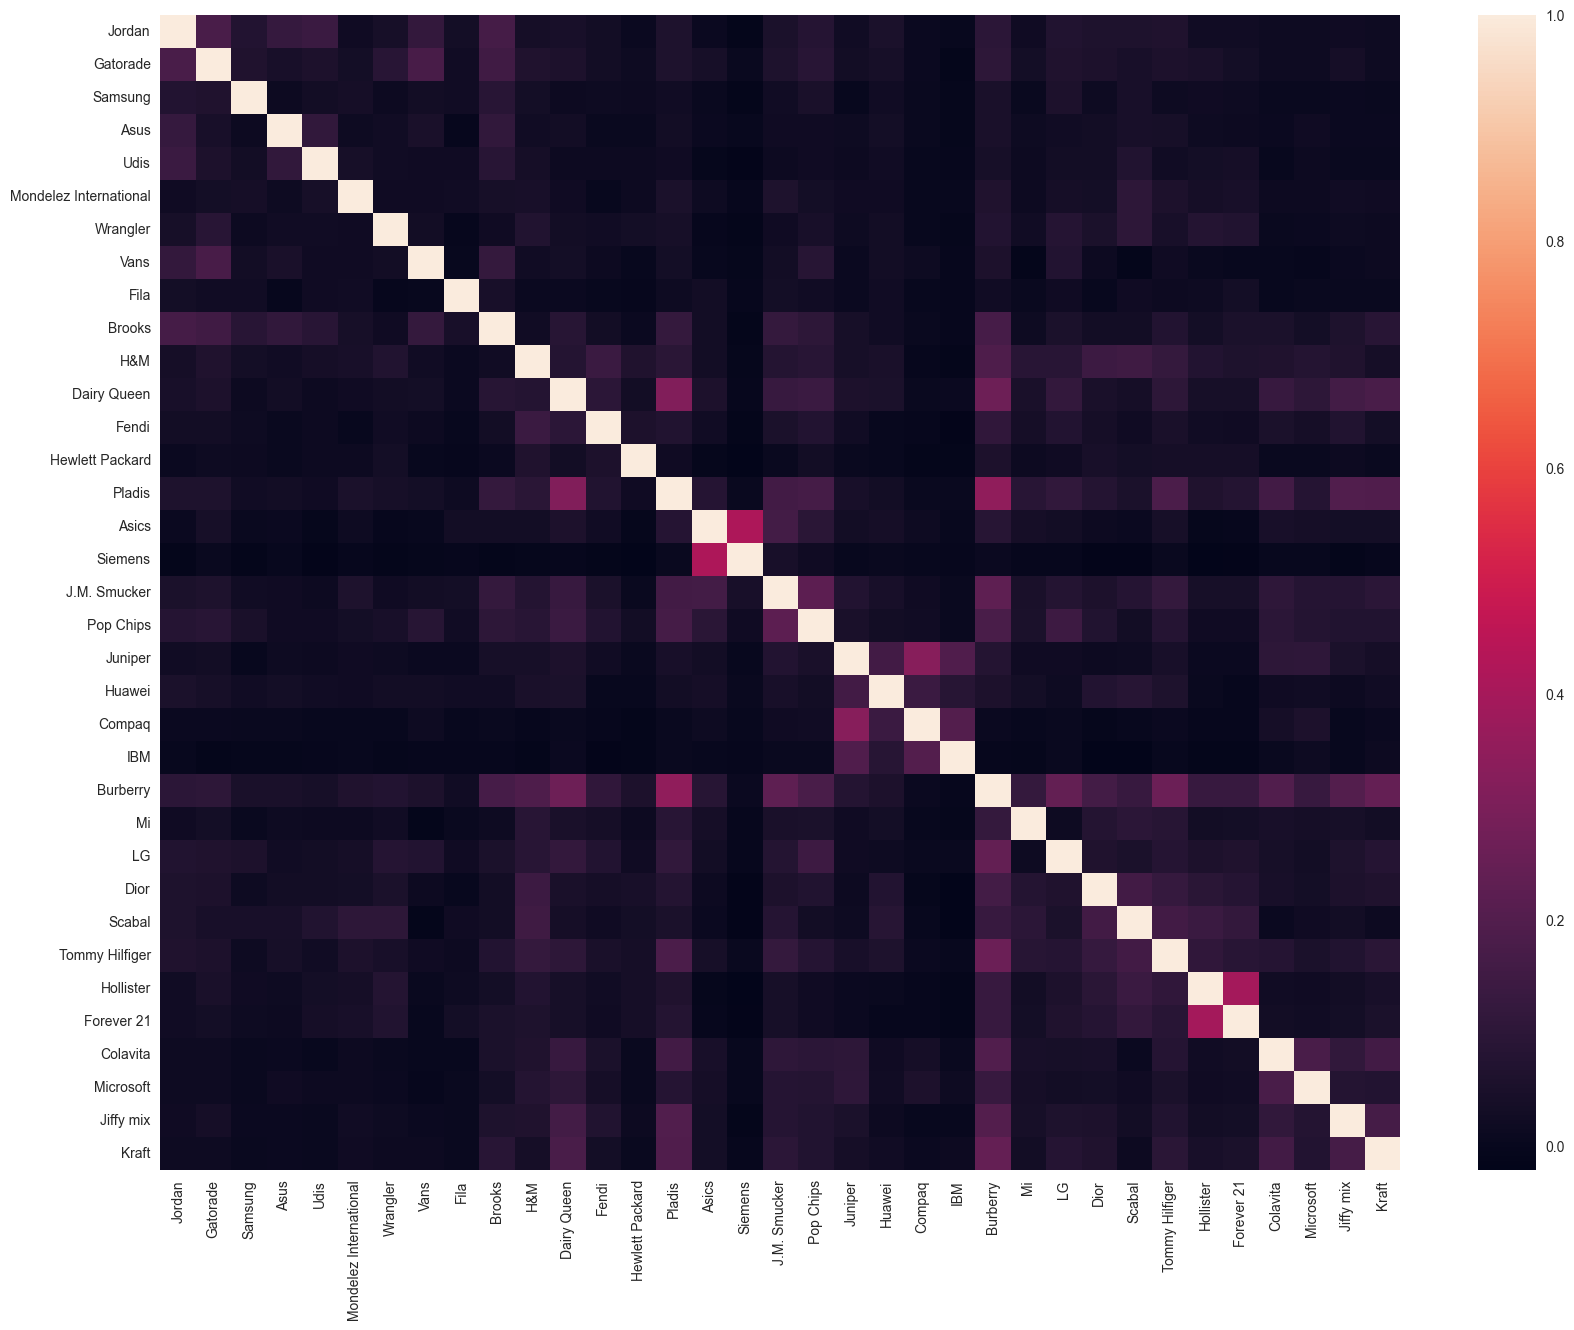

In [20]:
#HeatMap of Companies
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr()) #heatmap
plt.show()

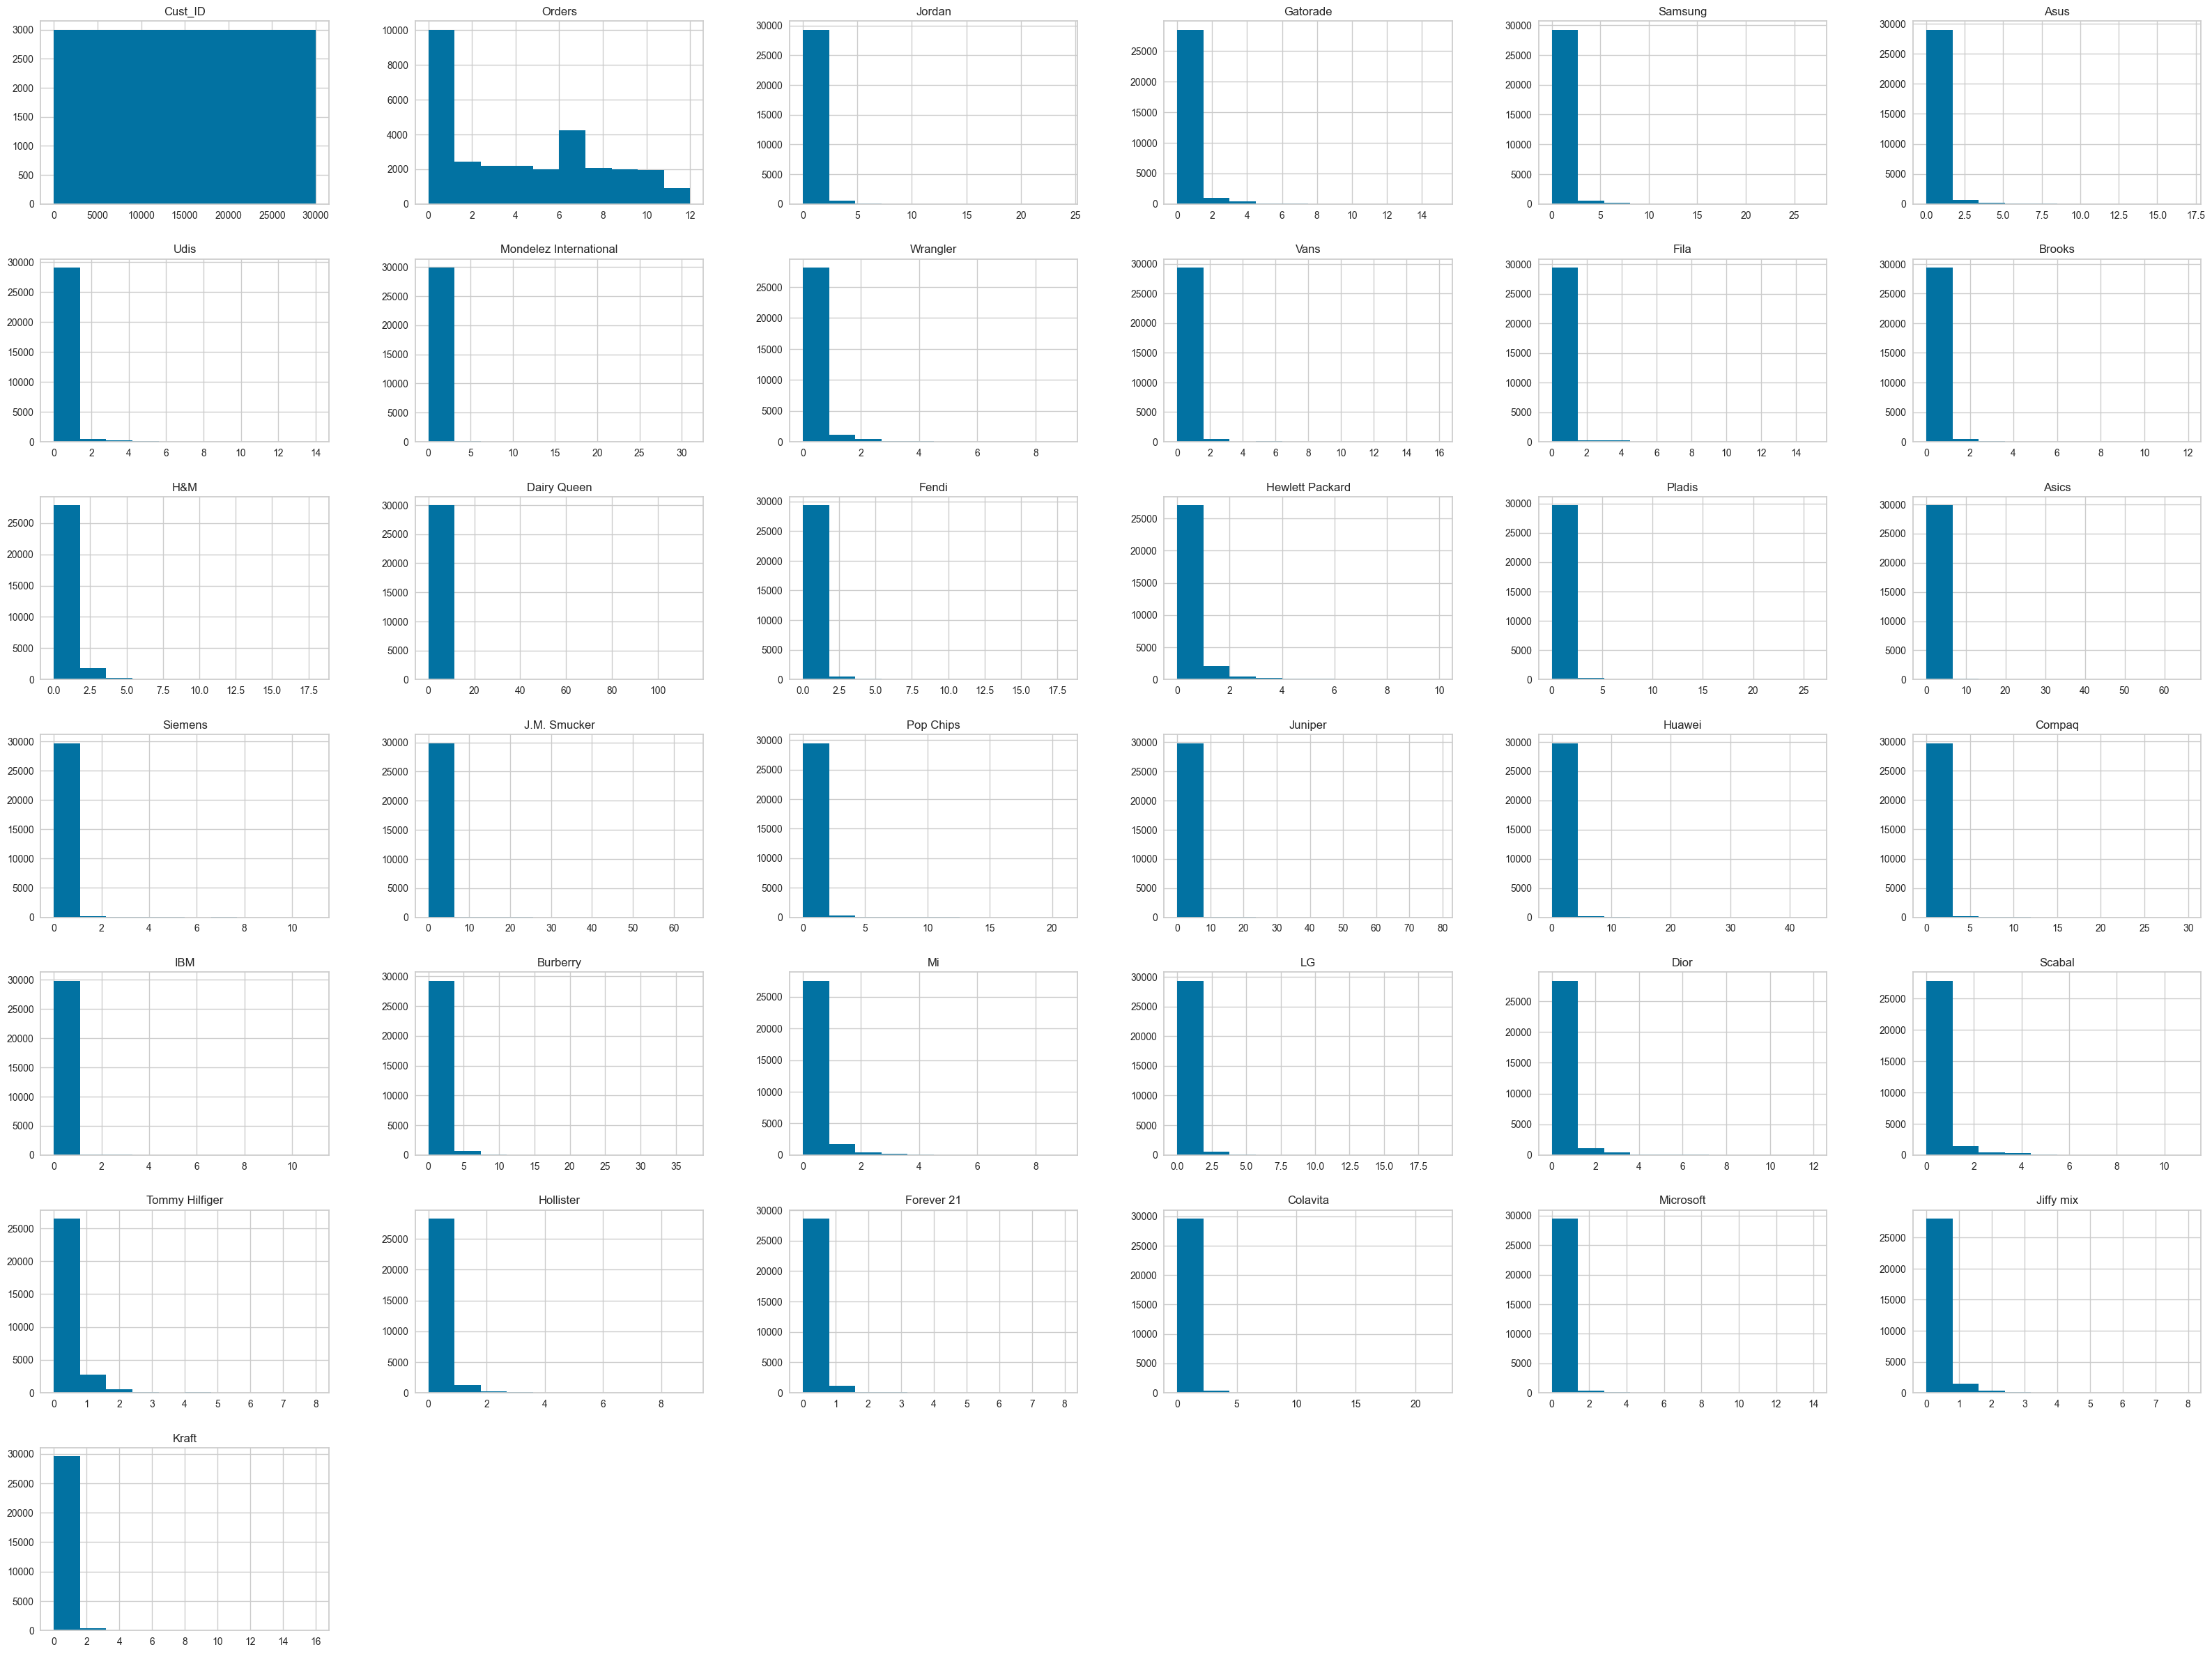

In [21]:
#histogram of first two rows
df.iloc[:30000,:].hist(figsize=(40,30))
plt.show()

In [22]:
new_df=df.copy() #creating another copy of dataset
new_df['Total Search']=new_df.iloc[:,3:].sum(axis=1) # Adding a new column named 'Total Search' which represents the sum of all searches

In [23]:
new_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,16


In [24]:
new_df.sort_values('Total Search',ascending=False) # Sorting the rows in Descending order according to total search values

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22829,22830,F,7,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7263,7264,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


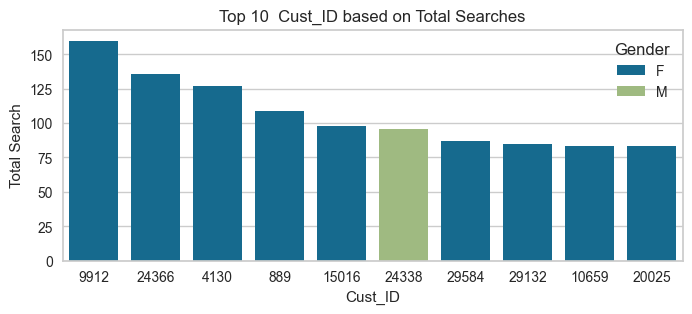

In [25]:
# Barplot of Top 10 customers according to the Total Search Values
plt.figure(figsize=(8,3))
plt_data=new_df.sort_values('Total Search',ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,x='Cust_ID',y='Total Search',hue='Gender',order=plt_data.sort_values(['Total Search'],ascending=False).Cust_ID)
plt.title("Top 10  Cust_ID based on Total Searches") #title for the plot
plt.show()

In [26]:
x=df.iloc[:,2:].values # selecting all numerical columns except first two columns
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]])

In [27]:
scale=MinMaxScaler() #Applying MinMaxscaler to rescale the values
features=scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Elbow method to get the optimal K Value

In [30]:
from sklearn.cluster import KMeans  # Import KMeans

scale = MinMaxScaler()
features = scale.fit_transform(x)  # Rescale your data

inertia = []
for i in range(1, 16):
    k_means = KMeans(n_clusters=i, n_init=10)  # Explicitly set n_init to suppress the warning
    k_means = k_means.fit(features)
    inertia.append(k_means.inertia_)  # Appending each inertia value into inertia list


In [31]:
inertia

[4257.8548299031545,
 2161.7801718292253,
 1826.5486128868147,
 1711.6760395930405,
 1659.20321517812,
 1618.8554168408325,
 1574.7533550578855,
 1534.0465554877003,
 1513.5017420153586,
 1472.8406789326893,
 1449.3461371228234,
 1434.5300606643195,
 1392.9371739889418,
 1388.0591137606666,
 1356.997239997929]

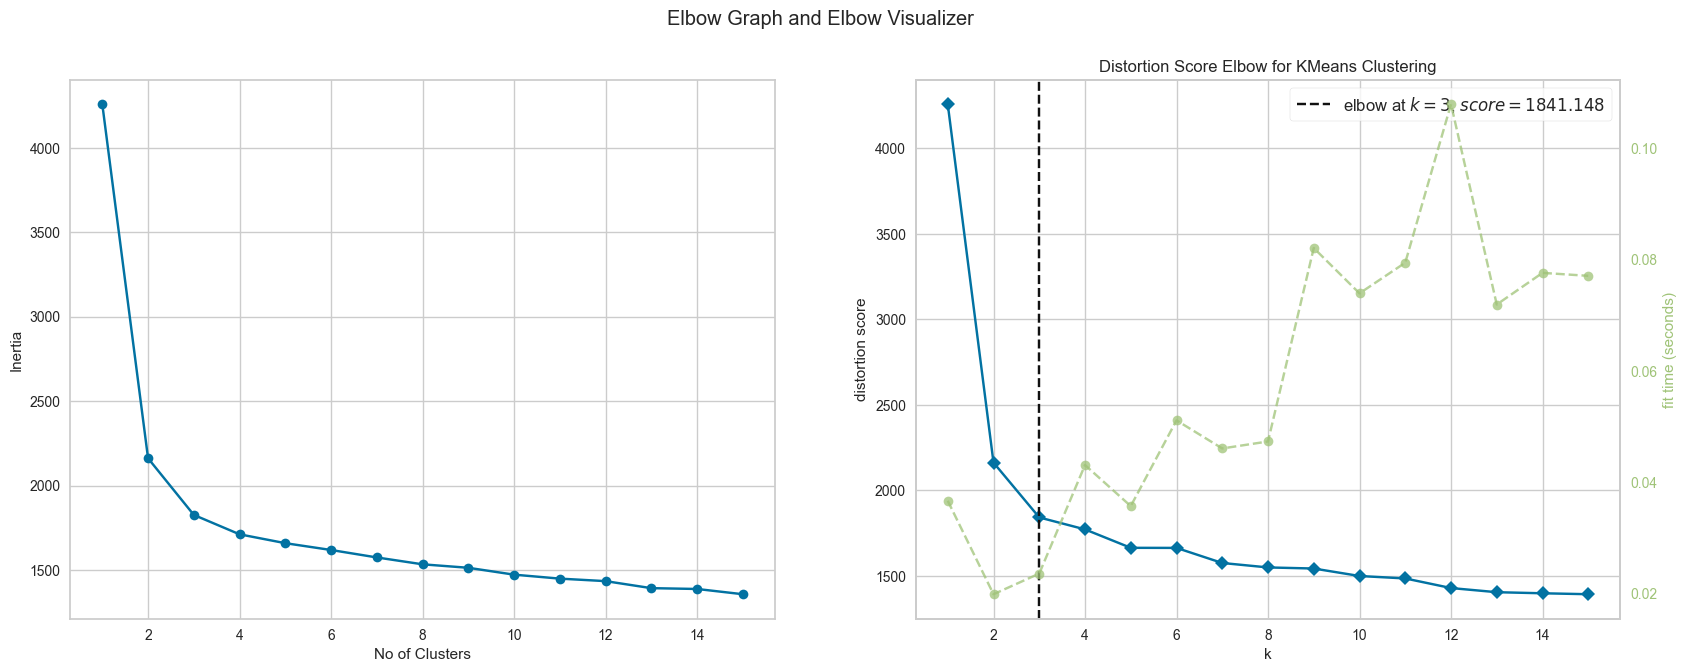

In [36]:
#Elbow Graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16),inertia,'bo-') # Plotting Inertia with blue colour circle dots and solid line('bo-')
plt.xlabel('No of Clusters'),plt.ylabel('Inertia')

#kelbow visualizer
plt.subplot(1,2,2)
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans,k=(1,16)) #Applying KElbowVisualizer from Yellowbrick
visualize.fit(features)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof() 
plt.show()

### Silhouette score for each k value

In [37]:
silhouette_avg=[]
for i in range(2,16):
    kmeans=KMeans(n_clusters=i)
    cluster_labels=kmeans.fit_predict(features)
    #Silhouette score
    silhouette_avg.append(silhouette_score(features,cluster_labels)) #Appending each Silhouette score into silhouette_avg list

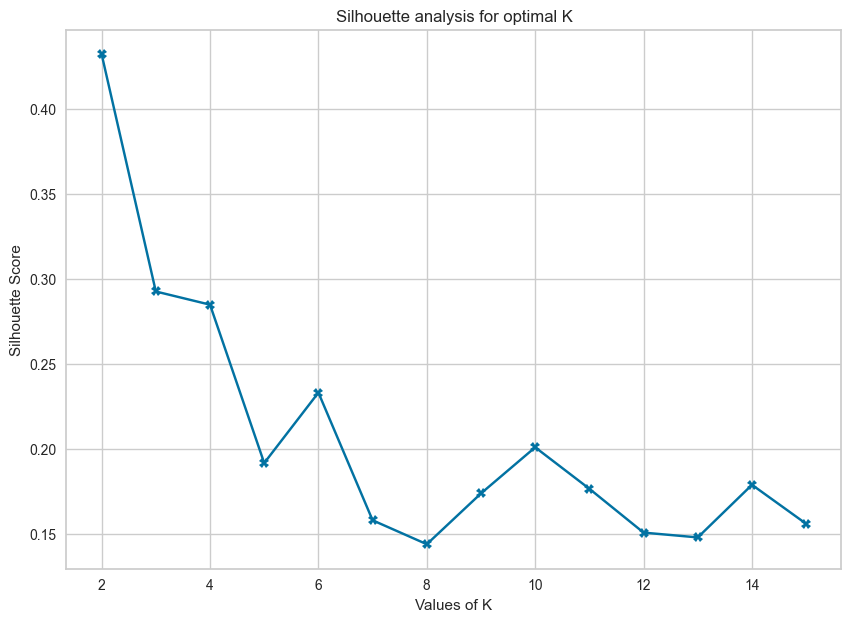

In [38]:
#Plotting Silhouette scores
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg,'bX-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis for optimal K')
plt.show()

### KMeans Model

#### Here we will take K value as 3 as per Elbow Method

In [39]:
model=KMeans(n_clusters=3) #Applying KMeans Model
model=model.fit(features)

In [40]:
y_km=model.predict(features) # storing the model predicted values
centers=model.cluster_centers_ # saving the cluster centers given by model

In [41]:
y_km

array([1, 0, 1, ..., 0, 0, 2], dtype=int32)

In [42]:
centers

array([[0.02261072, 0.00971528, 0.01391275, 0.00722611, 0.00860904,
        0.00944056, 0.00416358, 0.01121101, 0.0064498 , 0.00677989,
        0.01097236, 0.01603397, 0.00193053, 0.00700966, 0.01553447,
        0.00396142, 0.00387643, 0.00422305, 0.01080326, 0.01076067,
        0.00592193, 0.00546499, 0.00393606, 0.00306058, 0.01061641,
        0.01263181, 0.00543667, 0.02154512, 0.0313323 , 0.01963037,
        0.00802531, 0.00696803, 0.00851875, 0.00739974, 0.00977772,
        0.00480145],
       [0.6874347 , 0.01153697, 0.01804125, 0.00883556, 0.01009276,
        0.01057964, 0.00455836, 0.01182054, 0.00699606, 0.00595803,
        0.0123056 , 0.01940241, 0.0017745 , 0.00812414, 0.01668308,
        0.00392985, 0.00489402, 0.00481939, 0.01239842, 0.0123621 ,
        0.00593521, 0.00593876, 0.00410734, 0.00265392, 0.01180118,
        0.01388018, 0.0051326 , 0.02270081, 0.03497318, 0.01992478,
        0.00854701, 0.00680577, 0.00903229, 0.00856478, 0.01111534,
        0.00409689],
      

In [58]:
df['Cluster']=pd.DataFrame(y_km) #creating another column with model predicted values in the datset
df.to_csv("Cluster_data",index=False) #Writing the outputs into a csv file

In [59]:
df['Cluster'].value_counts() #Finding the counts of each cluster

Cluster
1    11167
0    10010
2     8823
Name: count, dtype: int64

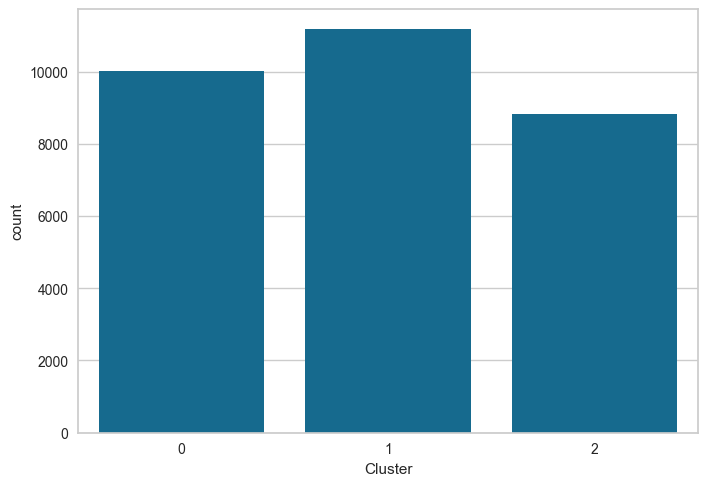

In [60]:
#Countplot of Cluster
sns.countplot(data=df,x='Cluster')
plt.show()

### Analyzing the Clusters

In [61]:
c_df=pd.read_csv('Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [62]:
c_df['Total Search']=c_df.iloc[:,3:38].sum(axis=1)

In [63]:
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster,Total Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,16


#### Analyzing the Cluster 0

In [65]:
cl_0=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==0') #selecting cluster 0 by grouping datset according to clusters and querying it with cluster 0
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,122813070,2275,1885,1503,1626,1454,1270,1147,...,2378,3304,1427,656,508,1555,902,668,641,55568
1,0,M,22222319,441,449,586,327,11,53,145,...,210,146,145,67,50,321,135,115,128,8486


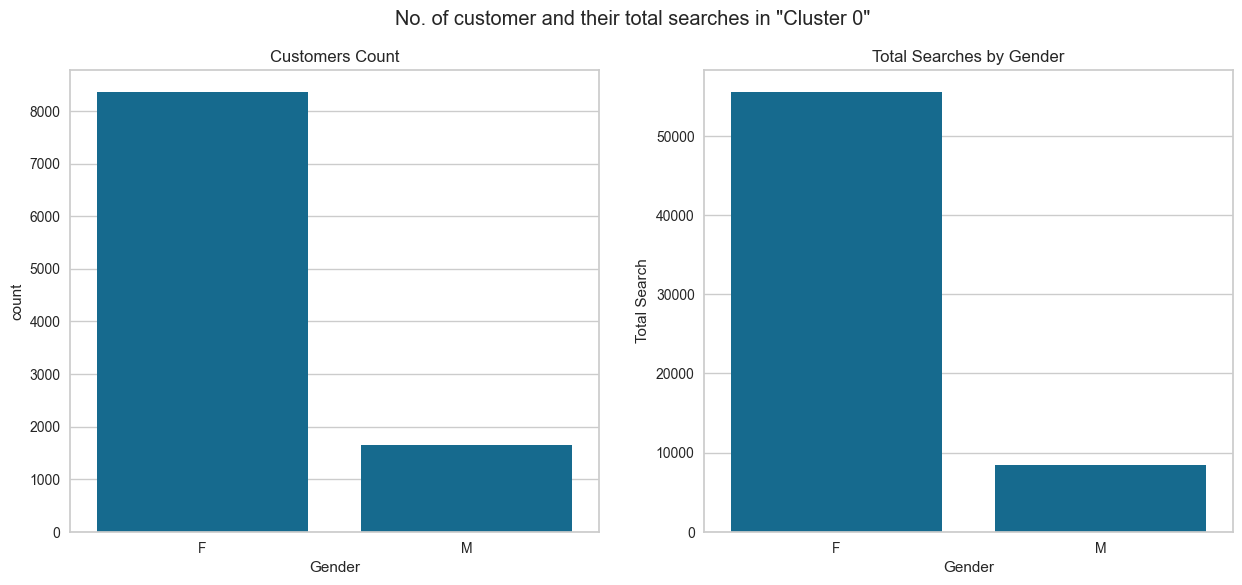

In [50]:
plt.figure(figsize=(15,6))
# countplot of cluster 0
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==0'),x='Gender')
plt.title('Customers Count')
#barplot of totalsearches of cluster 0
plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 0"')
plt.show()

#### Analyzing the Cluster 1

In [51]:
cl_1=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==1') #selecting cluster 1 by grouping datset according to clusters and querying it with cluster 1
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,141851723,75512,2441,2038,2239,1897,1592,1396,...,2696,4170,1607,751,556,1790,1110,852,602,67381
3,1,M,28352208,16607,651,984,425,19,62,182,...,346,126,173,108,52,429,229,141,130,11469


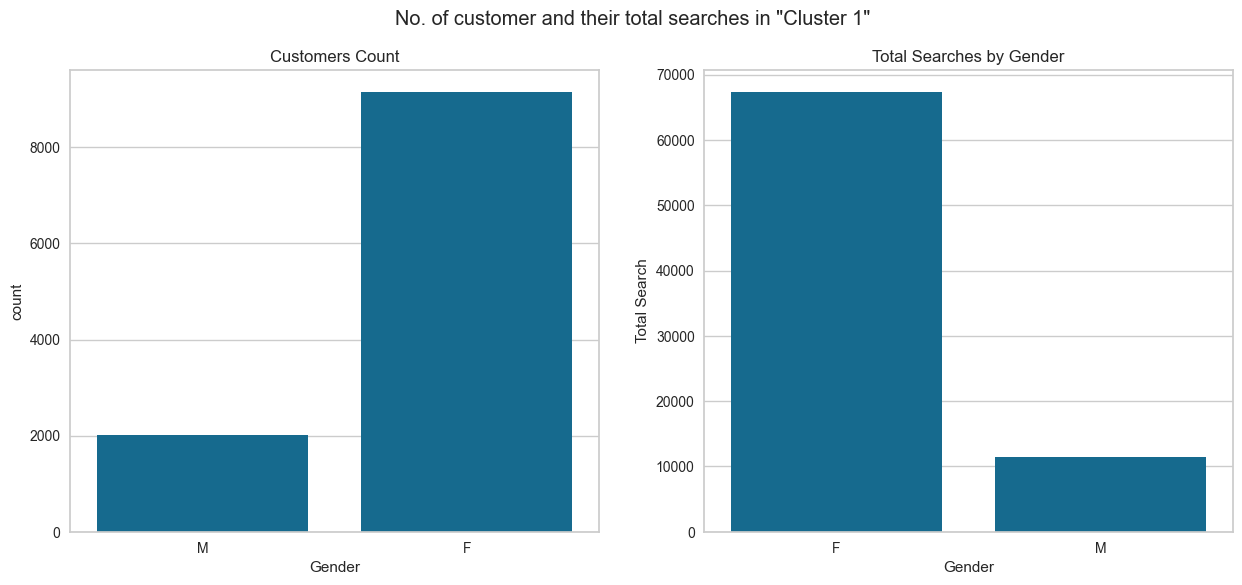

In [52]:
plt.figure(figsize=(15,6))
# countplot of cluster 1
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==1'),x='Gender')
plt.title('Customers Count')
#barplot of totalsearches of cluster 1
plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 1"')
plt.show()

#### Analyzing the Cluster 2

In [53]:
cl_2=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==2') #selecting cluster 2 by grouping datset according to clusters and querying it with cluster 2
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,113006850,24843,2049,1687,1726,1441,1263,1190,...,2247,3252,1291,694,518,1415,924,728,534,54542
5,2,M,21768830,5416,548,772,345,18,66,133,...,257,104,126,54,36,256,191,137,92,8697


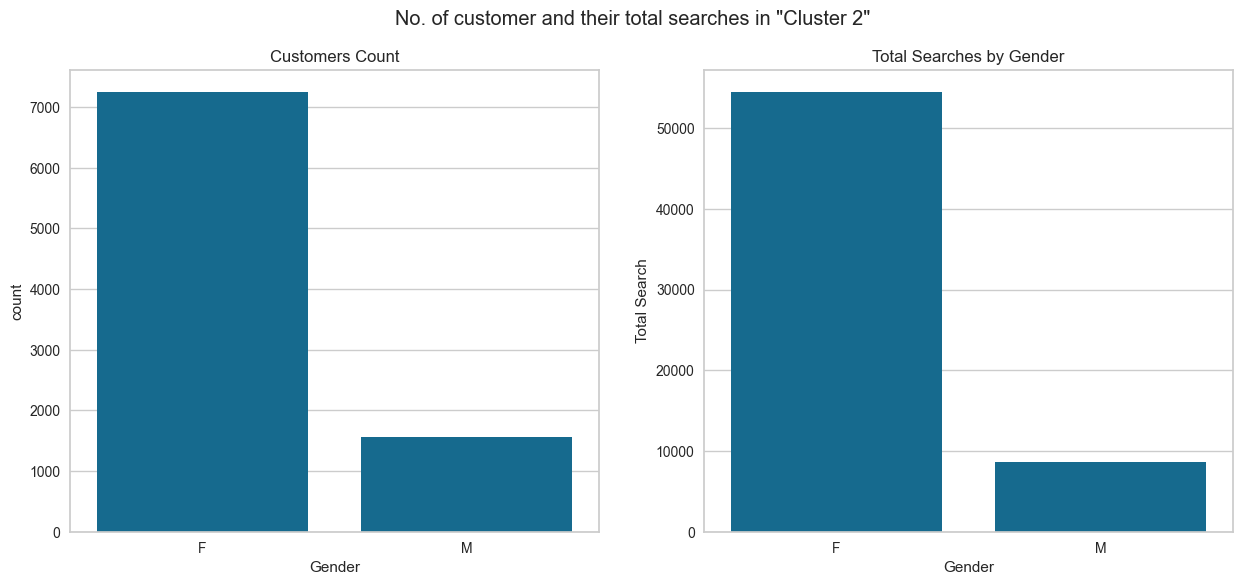

In [54]:
plt.figure(figsize=(15,6))
# countplot of cluster 2
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==2'),x='Gender')
plt.title('Customers Count')
#barplot of totalsearches of cluster 2
plt.subplot(1,2,2)
sns.barplot(data=cl_2,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of customer and their total searches in "Cluster 2"')
plt.show()

#### Overall Analysis

In [55]:
final_df=c_df.groupby(['Cluster'],as_index=False).sum() #Grouping datset according to clusters
final_df

,Cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,145035389,FFFFFFFFMFFMFFFFFFFFFFFFFFFFFFMFMMFFFFFFFFFFFF...,2716,2334,2089,1953,1465,1323,1292,...,2588,3450,1572,723,558,1876,1037,783,769,64054
1,1,170203931,MMFFMFFFFMFMMFFMFMFMFFFMFMMFMMFFFFMFFFFMFFFFFF...,92119,3092,3022,2664,1916,1654,1578,...,3042,4296,1780,859,608,2219,1339,993,732,78850
2,2,134775680,FFFFFFFFFFFMMFMFFFFFFFFMFFFFFFFFMFFFFFFMFFFFFF...,30259,2597,2459,2071,1459,1329,1323,...,2504,3356,1417,748,554,1671,1115,865,626,63239


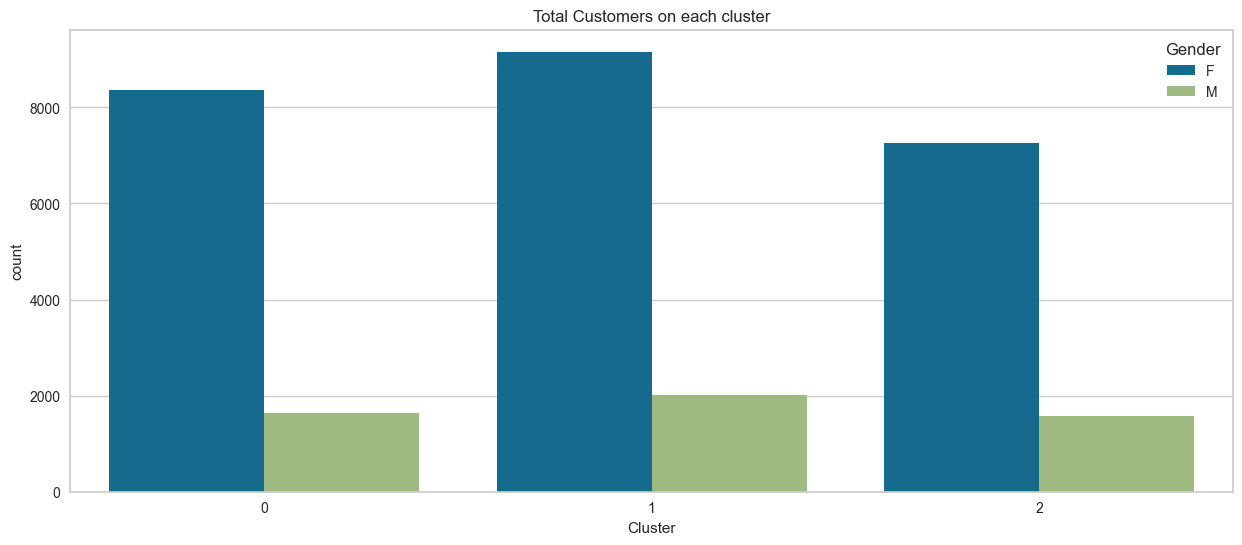

In [56]:
#countplot of each cluster
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='Cluster',hue='Gender')
plt.title('Total Customers on each cluster')
plt.show()

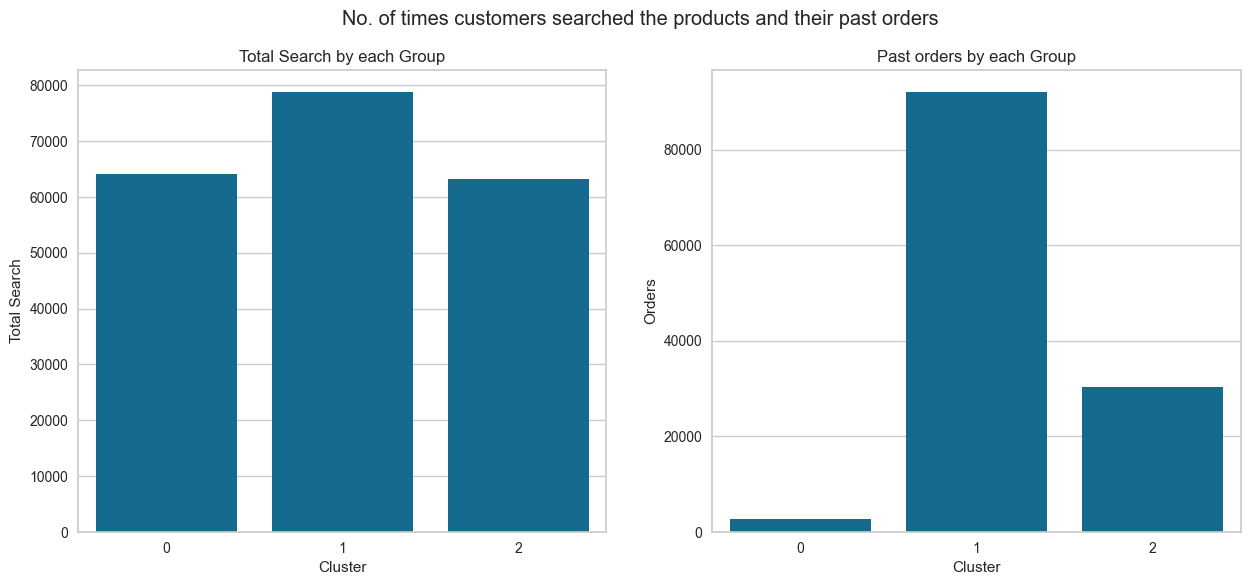

In [57]:
plt.figure(figsize=(15,6))
#barplot of total searches of each cluster
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total Search')
plt.title('Total Search by each Group')
#barplot of orders of each cluster
plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Past orders by each Group')
plt.suptitle('No. of times customers searched the products and their past orders')
plt.show()